![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [5]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [6]:
import torchvision.datasets

In [7]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [119]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [9]:
len(y_train), len(y_test)

(60000, 10000)

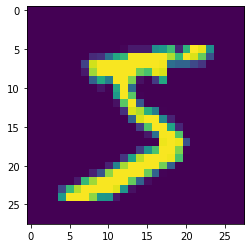

tensor(5)


In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [120]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [98]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [131]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=3, padding=2)
        self.act1  = torch.nn.ELU()
        #self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv11=torch.nn.Conv2d(in_channels=6, out_channels=8,kernel_size=3,padding=0)
        self.act11=torch.nn.ELU()
        self.pool11=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=8, out_channels=16, kernel_size=4, padding=0)
        self.act2  = torch.nn.ELU()
        self.conv2_2=torch.nn.Conv2d(in_channels=16, out_channels=32,kernel_size=3,padding=1)
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        """self.conv22=torch.nn.Conv2d(in_channels=32,out_channels=16,kernel_size=3,padding=1)
        self.act22=torch.nn.ReLU()
        self.pool22=torch.nn.MaxPool2d(kernel_size=2,stride=1)"""


        #self.conv3=torch.nn.Conv2d(in_channels=)
        self.fc1   = torch.nn.Linear(5*5*32, 120)
        self.act3  = torch.nn.ELU()
        
        self.fc2   = torch.nn.Linear(120,84)
        self.act4  = torch.nn.Tanh()
        
        #self.fc22=torch.nn.Linear(84,40)
        #self.act222=torch.nn.ReLU()

        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        #x = self.pool1(x)
        
        x=self.conv11(x)
        x=self.act11(x)
        x=self.pool11(x)


        x = self.conv2(x)
        x = self.act2(x)
        x=self.conv2_2(x)
        x = self.pool2(x)
        

        """x=self.conv22(x)
        x=self.act22(x)
        x=self.pool22(x)"""


        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        #x=self.fc22(x)
        #x=self.act222(x)

        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [132]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [133]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet5.parameters(), lr=1.0e-3,momentum=0.9)

In [135]:
batch_size = 128

test_accuracy_history = []
test_loss_history = []
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(50):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)
    

tensor(0.9929)
tensor(0.9928)
tensor(0.9929)
tensor(0.9928)
tensor(0.9929)
tensor(0.9929)
tensor(0.9927)
tensor(0.9926)
tensor(0.9929)
tensor(0.9928)
tensor(0.9927)
tensor(0.9931)
tensor(0.9931)
tensor(0.9930)
tensor(0.9927)
tensor(0.9930)
tensor(0.9931)
tensor(0.9930)
tensor(0.9930)
tensor(0.9933)
tensor(0.9930)
tensor(0.9930)
tensor(0.9930)
tensor(0.9930)
tensor(0.9932)
tensor(0.9930)
tensor(0.9932)
tensor(0.9930)
tensor(0.9932)
tensor(0.9931)
tensor(0.9932)
tensor(0.9932)
tensor(0.9931)
tensor(0.9931)
tensor(0.9929)
tensor(0.9931)
tensor(0.9933)
tensor(0.9933)
tensor(0.9931)
tensor(0.9930)
tensor(0.9930)
tensor(0.9935)
tensor(0.9928)
tensor(0.9928)
tensor(0.9929)
tensor(0.9929)
tensor(0.9932)
tensor(0.9931)
tensor(0.9930)
tensor(0.9929)


In [136]:
print('Best accuracy = {}\nMin Loss = {}\nOptim_epoch = {}'.format(round(np.array(test_accuracy_history).max().astype(float),4), 
                                                        round(np.array(test_loss_history).min().astype(float), 4), 
                                                        test_loss_history.index(np.array(test_loss_history).min())), end=' ')

Best accuracy = 0.9935
Min Loss = 0.0239
Optim_epoch = 11 

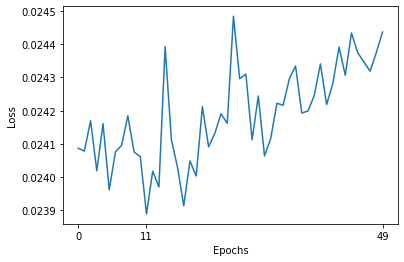

In [137]:

plt.figure(facecolor='w');
plt.plot(test_loss_history);
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.xticks((0, epoch, test_loss_history.index(np.array(test_loss_history).min())));

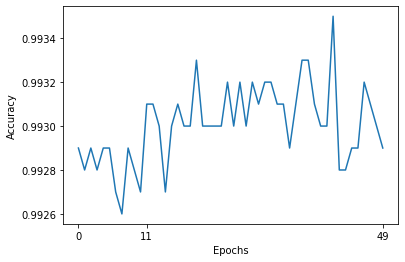

In [139]:
plt.figure(facecolor='w');
plt.plot(test_accuracy_history);
plt.xlabel('Epochs');
plt.ylabel('Accuracy');
plt.xticks((0, epoch, test_loss_history.index(np.array(test_loss_history).min())));

In [ ]:
lenet5.forward(X_test)

In [ ]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);